
# Datacamp business case project
___
# Improving an insurance company's profit  


##### Reka HALMAI, Aymen MEJRI, Ahmed BEJAOUI, Raphaël ATTALI, Mohamed GHARBI, Benjamin LAZARD

## Table of contents

0. [Summary](#0-bullet)  <br>
    0.1. [Context](#0.1-bullet)  <br>
    0.2. [Data sources](#0.2-bullet)  <br>
    0.3. [Suggested studies](#0.3-bullet)  <br>
1. [Dataset Analysis](#1-bullet)  <br>
    1.1. [Latest policy info dataframe](#1.1-bullet)  <br>
    1.2. [Policy info dataframe](#1.2-bullet)  <br>
    1.3. [Customer info dataframe](#1.3-bullet)  <br>
    1.4. [Agent info info dataframe](#1.4-bullet)  <br>
    1.5. [Global merge](#1.5-bullet)  <br>
    1.6. [Data cleaning](#1.6-bullet)  <br>  
2. [Visualization](#2-bullet)  <br>
    2.1. [Seasonality](#2.1-bullet)  <br>
    2.2. [Product Performance](#2.2-bullet)  <br>
    2.3. [Clustering](#2.3-bullet)  <br>
3. [Studies](#3-bullet)  <br>
    3.1. [Global Churn prediction:  what are the main factors leading to churn?](#3.1-bullet)  <br>
    3.2. [Customer Value regression: which customers are to be tareted by the insurer?](#3.2-bullet) <br>
    3.3. [Agent performance regression: what are the best performing agents?](#3.3-bullet)  <br>  
4. [Conclusion](#4-bullet)  <br>


# 0. Summary <a class="anchor" id="0-bullet"></a> 

## 0.1. Context <a class="anchor" id="0.1-bullet"></a> 

This project attempt to analyse three ways an insurance company could perform better- that is to have a long-staying clientele, better performing agent and gathering higher sales levels. In what follows we analyse how the company could limit the number of customers who cancel their subscriptions and how much customers are willing to pay for a given policy.
    
We have 4 datasets each gathered by the same insurance company in Asia. The data is anonymized, and both the name of the company and the exact location are confidential informations. 
    
## 0.2. Data sources <a class="anchor" id="0.2-bullet"></a> 

We possess 4 anonymized datasets provided by an insurance company in the context of a challenge for recruitment. It corresponds to the activities of the insurer in one city. It goes without saying although the data is anonymized, we would like to avoit its diffusion on the web.

- **policy_info**: a list of contracts, serves as the main table that can join all four tables together. A contract is identified by a unique contract ID, the ID of the corresponding customer and agent. Other informations are available such as: the payment type, the sum assured, the number of riders and the policy premium.
- **latest_policy_info**: a dataset providing the status of the contracts (e.g still active, or cancelled). This table can be joint to the main **policy_info** table by the policies' ID-s.
- **customer_info**: a dataset providing information of the clientele containing information such as gender, marital status, income, etc. This table can be joint to the main **policy_info** table by the customers' ID-s. The name of the customers is explicit for confidentiality reasons.
- **agent_info**: a dataset providing information on the agents containing information such as tenure, number of active portfolios, etc. This table can be joint to the main **policy_info** table by the agents' ID-s. The name is explicit for confidentiality reasons.
    
## 0.3. Suggested studies <a class="anchor" id="0.3-bullet"></a> 
   
How to limit churn and improve performance is a complex problem. There are a number of actions that could be taken to achieve this goal. We propose the following studies:

 - **Global prediction of the risk of churn**: using all available data for each contract, can we predict for a new contract if it is likely to be cancelled ? This could serve as a future use identify those clients that are likely to leave the company. If the model is explicable, we can also highlight the reasons behind churn by order of importance and take actions to reducce them for all customers. We attack this problem as a classification task - predicting whether a client will leave or stay. Gathering the right features from the data is the main challenge here.
 - **Providing a metric for the performance of agents**: What are the main factors related solely to the insurer's workforce that could be used as levers to limit churn. Can we rate agents? Should the company limit the number of customers of each agent? Hire younger agents? This is what we investigate. This challenge is more about visualization, and involves the definition of KPI.
 - **What amount are customers ready to pay for an insurance policy?**: given a customer profile, what is the most expensive policy they are likely to buy? This study highlight another important element of the performance analysis, good pricing of a policy given a client. We treat this problem as a regression task.
 - **Can we identify similar groups of customers**: if we can cluster customers, and identify groups, then the insurer will be able to design the minimum number of policies reaching the largest audience and personalize more the policies offert to these groups. 
 
 
# 1. Dataset analysis<a class="anchor" id="1-bullet"></a> 

First, let us explore the data, and outline strange points. 

In [1]:
import numpy as np
import pandas as pd
import pydotplus
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (16.0, 5.0)
from display_functions import display_data_types, show_values, display_na
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read all datasets
df_latest_policy_info = pd.read_csv("latest_policy_info.csv", sep=",")
df_policy_info = pd.read_csv("policy_info.csv", sep=",")
df_customer_info = pd.read_csv("customer_info.csv", sep=",")
df_agent_info = pd.read_csv("agent_info.csv", sep=",")

# Change all date cols for date formats
list_of_df = [df_policy_info, df_latest_policy_info, df_customer_info, df_agent_info]
time_cols = ['last_payment_dt', 'policy_issue_dt', 'time_stamp', 'last_termination_dt']
for df in list_of_df:
    for time in time_cols:
        if time in df: 
            df[time] = pd.to_datetime(df[time], format='%Y-%m-%d')

## 1.1 `df_latest_policy_info`  dataframe <a class="anchor" id="1.1-bullet"></a> 

In [4]:
display_data_types(df_latest_policy_info)
display_na(df_latest_policy_info)
print("\n\n Distribution of the status of the policies in the dataset:\n", 
      df_latest_policy_info['last_policy_status'].value_counts())
show_values(df_latest_policy_info)
df_latest_policy_info.head()

Data types


policy_id                      object
last_policy_status             object
last_termination_dt    datetime64[ns]
time_stamp             datetime64[ns]
dtype: object


policy_id               0.000000
last_policy_status      0.000000
last_termination_dt    84.981897
time_stamp              0.000000
dtype: float64


 Distribution of the status of the policies in the dataset:
 active       11640
cancelled     2170
Name: last_policy_status, dtype: int64


Data types of column,policy_id,['P_05362503' 'P_05784548' 'P_02113832' ... 'P_09201819' 'P_03341469' 'P_01812163']


Data types of column,last_policy_status,['active' 'cancelled']


,policy_id,last_policy_status,last_termination_dt,time_stamp
0,P_05362503,active,NaT,2018-01-31
1,P_05784548,cancelled,2017-08-31,2018-01-31
2,P_02113832,active,NaT,2018-01-31
3,P_01777448,active,NaT,2018-01-31
4,P_00703708,active,NaT,2018-01-31


We see that we have a lot of missing variables for `last_termination_dt`. This column shows the cancellation date if the policy has been cancelled, so it is normal that it is N/A for active policies. Let's see if there are any other N/A values.

In [5]:
cancelled_ = df_latest_policy_info[(pd.isna(df_latest_policy_info['last_termination_dt'])) & (df_latest_policy_info['last_policy_status'] == 'cancelled')]
print("Number of policies cancelled with NA Termination date :", cancelled_.shape[0])
# df_latest_policy_info = df_latest_policy_info.drop(columns=["last_termination_dt"])

Number of policies cancelled with NA Termination date : 97


We see that although we have some policies with Na values that are already cancelled. This is an inacciracy of the dataset. 

## 1.2  `df_policy_info`  dataframe <a class="anchor" id="1.2-bullet"></a> 

In [6]:
display_data_types(df_policy_info)
display_na(df_policy_info)
show_values(df_policy_info)
df_policy_info.head()

Data types


policy_id                   object
customer_id                 object
agent_id                    object
policy_status               object
last_payment_dt     datetime64[ns]
payment_method              object
policy_issue_dt     datetime64[ns]
contact_channel             object
product_code                object
policy_status_cd            object
sum_assured                float64
policy_premium             float64
nb_riders                  float64
rider_premium              float64
time_stamp          datetime64[ns]
dtype: object


policy_id            0.000000
customer_id          0.000000
agent_id             0.000000
policy_status        0.000000
last_payment_dt      0.000000
payment_method      35.433255
policy_issue_dt      0.000000
contact_channel      0.000000
product_code         0.000000
policy_status_cd     0.000000
sum_assured          0.000000
policy_premium       0.000000
nb_riders            0.000000
rider_premium        0.000000
time_stamp           0.000000
dtype: float64


Data types of column,policy_id,['P_09999136' 'P_09997871' 'P_09997185' ... 'P_00002829' 'P_00002382' 'P_00000056']


Data types of column,customer_id,['C_09808525' 'C_07900045' 'C_01035799' ... 'C_07153911' 'C_05661333' 'C_04068801']


Data types of column,agent_id,['AG_03198874' 'AG_05276714' 'AG_04302485' ... 'AG_08081725' 'AG_04377203' 'AG_00318885']


Data types of column,policy_status,['active']


Data types of column,payment_method,[nan 'auto']


Data types of column,contact_channel,['agency' 'broker' 'direct' 'partnership']


Data types of column,product_code,['BP_00479053' 'BP_03740581' 'BP_00069568' 'BP_04345985' 'BP_02602657' 'BP_04904952' 'BP_00334803' 'BP_03610818' 'BP_05367939' 'BP_06342177' 'BP_09828249' 'BP_06134513' 'BP_02713903' 'BP_09034941' 'BP_02392541' 'BP_01087308' 'BP_07897771' 'BP_09825120' 'BP_03765630' 'BP_06758239' 'BP_02051691' 'BP_01127451' 'BP_03569413' 'BP_04229248' 'BP_01260044' 'BP_09740724' 'BP_05169954' 'BP_08525135' 'BP_07668115' 'BP_04044020' 'BP_01308135' 'BP_09391664' 'BP_04023598' 'BP_02483900' 'BP_02399030' 'BP_07119562' 'BP_07665809' 'BP_02048854' 'BP_04624090' 'BP_08252793' 'BP_03919759' 'BP_04707731' 'BP_04399222' 'BP_01653768' 'BP_00170090' 'BP_01817929' 'BP_05538098' 'BP_08384630' 'BP_09426101' 'BP_07570704' 'BP_09208081' 'BP_03922794' 'BP_01183560' 'BP_06646153' 'BP_01976597']


Data types of column,policy_status_cd,['A' 'B']


,policy_id,customer_id,agent_id,policy_status,last_payment_dt,payment_method,policy_issue_dt,contact_channel,product_code,policy_status_cd,sum_assured,policy_premium,nb_riders,rider_premium,time_stamp
0,P_09999136,C_09808525,AG_03198874,active,2016-09-30,NaN,2015-08-31,agency,BP_00479053,A,1252000.0,1500.0,1.0,1100.0,2017-01-31
1,P_09997871,C_07900045,AG_05276714,active,2016-12-31,auto,2016-12-31,agency,BP_03740581,A,1072000.0,2200.0,2.0,1600.0,2017-01-31
2,P_09997185,C_01035799,AG_04302485,active,2016-04-30,NaN,2015-04-30,agency,BP_00069568,A,1274000.0,1700.0,2.0,1300.0,2017-01-31
3,P_09996824,C_08796001,AG_04873767,active,2016-07-31,NaN,2014-08-31,broker,BP_04345985,A,1720000.0,2900.0,1.0,1400.0,2017-01-31
4,P_09996157,C_01435905,AG_07944835,active,2016-04-30,auto,2011-04-30,agency,BP_02602657,A,1360000.0,1700.0,3.0,1400.0,2017-01-31


The feature `payment_method` seems not very informative as we see above: it contains a lot of missing values. We show below, that has only one other value, and because of this, we decide to drop it.

In [7]:
print("Unique values of payment_method :", pd.unique(df_policy_info.payment_method))
df_policy_info = df_policy_info.drop('payment_method', axis=1)

Unique values of payment_method : [nan 'auto']


## 1.3  `df_customer_info`  dataframe <a class="anchor" id="1.3-bullet"></a> 

In [8]:
display_data_types(df_customer_info)
display_na(df_customer_info)
show_values(df_customer_info)
df_customer_info.head()

Data types


customer_id                             object
customer_origin                         object
customer_gender                         object
customer_marital_cd                      int64
customer_age                           float64
customer_social_group                  float64
customer_income                        float64
customer_additional_products             int64
time_stamp                      datetime64[ns]
dtype: object


customer_id                     0.000000
customer_origin                 0.000000
customer_gender                 0.000000
customer_marital_cd             0.000000
customer_age                    0.000000
customer_social_group           0.000000
customer_income                 8.404356
customer_additional_products    0.000000
time_stamp                      0.000000
dtype: float64


Data types of column,customer_id,['C_08731460' 'C_05449312' 'C_03363701' ... 'C_05558075' 'C_06555729' 'C_01527580']


Data types of column,customer_origin,['new' 'existing']


Data types of column,customer_gender,['F' 'M' '0']


,customer_id,customer_origin,customer_gender,customer_marital_cd,customer_age,customer_social_group,customer_income,customer_additional_products,time_stamp
0,C_08731460,new,F,2,35.0,5.0,65000.0,1,2017-01-31
1,C_05449312,new,M,1,45.0,3.0,75000.0,2,2017-01-31
2,C_03363701,new,M,2,40.0,7.0,95000.0,3,2017-01-31
3,C_08411735,new,M,2,40.0,8.0,70000.0,1,2017-01-31
4,C_03778133,new,F,2,35.0,7.0,130000.0,4,2017-01-31


## 1.4  `df_agent_info` dataframe <a class="anchor" id="1.4-bullet"></a> 

In [9]:
display_data_types(df_agent_info)
display_na(df_agent_info)
show_values(df_agent_info)
df_agent_info.head()

Data types


agent_id                            object
agent_age                          float64
agent_tenure                         int64
agent_status                        object
agent_active_portfolio             float64
agent_inactive_portfolio           float64
time_stamp                  datetime64[ns]
dtype: object


agent_id                    0.0
agent_age                   0.0
agent_tenure                0.0
agent_status                0.0
agent_active_portfolio      0.0
agent_inactive_portfolio    0.0
time_stamp                  0.0
dtype: float64


Data types of column,agent_id,['AG_08346231' 'AG_06776450' 'AG_04703674' ... 'AG_02557702' 'AG_02328517' 'AG_06391963']


Data types of column,agent_status,['active' 'inactive']


,agent_id,agent_age,agent_tenure,agent_status,agent_active_portfolio,agent_inactive_portfolio,time_stamp
0,AG_08346231,40.0,10,active,53.0,52.0,2017-01-31
1,AG_06776450,50.0,7,active,58.0,55.0,2017-01-31
2,AG_04703674,55.0,10,active,81.0,61.0,2017-01-31
3,AG_03793197,35.0,8,active,99.0,61.0,2017-01-31
4,AG_07126385,40.0,9,active,96.0,59.0,2017-01-31


## 1.5 Merging the dataframes <a class="anchor" id="1.5-bullet"></a> 

Some of the studies we suggest may benefit from the crossing of these datasets therefore we create here a merged table 'data'. However, not all studies use the same exact merge and therefore we might define a different technic to merge the datasets. 

- join `df_policy_info` and `df_latest_policy_info` together the policy_id
- join `df_customer_info` and `df_policy_info` by customer_id
- join `df_agent_info` and `df_policy_info` by agent_id

In [10]:
policies_merged = pd.merge(df_policy_info, df_latest_policy_info, on='policy_id')

# Checking left-out observations
print("Left-out data from the table 'df_policy_info' :", df_policy_info[(~df_policy_info.policy_id.isin(policies_merged.policy_id))].shape[0])
print("Left-out data from the table 'df_policy_info' : ", df_latest_policy_info[(~df_latest_policy_info.policy_id.isin(policies_merged.policy_id))].shape[0])

# Saving policies present in 'df_latest_policy_info' but not in 'df_policy_info'
new_policies = df_latest_policy_info[(~df_latest_policy_info.policy_id.isin(policies_merged.policy_id))]

Left-out data from the table 'df_policy_info' : 0
Left-out data from the table 'df_policy_info' :  1000


Left-out information is the result of the difference in time of the data collection: `df_policy_info` contains data pulled a year before `df_latest_policy_info` was created.

In [11]:
# Next merge df_customer_info with data
pol_cus = pd.merge(policies_merged, df_customer_info, on='customer_id')

# Checking left-out observations
print("Left-out data from the table 'df_customer_info' :", df_customer_info[(~df_customer_info.customer_id.isin(pol_cus.customer_id))].shape[0])
print("Left-out data from the table 'df_policy_info' :", df_policy_info[(~df_policy_info.customer_id.isin(pol_cus.customer_id))].shape[0])

# Saving policies present in 'df_customer_info' but not in 'df_policy_info'
left_out_customer = df_customer_info[(~df_customer_info.customer_id.isin(pol_cus.customer_id))]

Left-out data from the table 'df_customer_info' : 500
Left-out data from the table 'df_policy_info' : 0


In [12]:
# Finally join the agent table: 
data = pd.merge(pol_cus, df_agent_info, on='agent_id')

# Checking left-out observations
print("Left-out data from the table 'df_agent_info' :", df_agent_info[(~df_agent_info.agent_id.isin(data.agent_id))].shape[0])
print("Left-out data from the table 'df_policy_info' :", df_policy_info[(~df_policy_info.agent_id.isin(data.agent_id))].shape[0])


Left-out data from the table 'df_agent_info' : 200
Left-out data from the table 'df_policy_info' : 0


700 rows were eliminated in the final merge as there were more agents and customers data than policy data...

## 1.6. Cleaning <a class="anchor" id="1.6-bullet"></a> 

In the final dataset, the feature customer_income still has (a resonable amount of) missing values, last_termination_dt is hardly exploitable, and the rest is perfect.

In [13]:
# data = data.drop(columns=["last_termination_dt"])
display_na(data)

policy_id                        0.000000
customer_id                      0.000000
agent_id                         0.000000
policy_status                    0.000000
last_payment_dt                  0.000000
policy_issue_dt                  0.000000
contact_channel                  0.000000
product_code                     0.000000
policy_status_cd                 0.000000
sum_assured                      0.000000
policy_premium                   0.000000
nb_riders                        0.000000
rider_premium                    0.000000
time_stamp_x                     0.000000
last_policy_status               0.000000
last_termination_dt             84.496487
time_stamp_y                     0.000000
customer_origin                  0.000000
customer_gender                  0.000000
customer_marital_cd              0.000000
customer_age                     0.000000
customer_social_group            0.000000
customer_income                  6.994536
customer_additional_products     0

Let us perform a quick correlation analysis: should we remove some variables beforehand if they are highly correlated with each other?

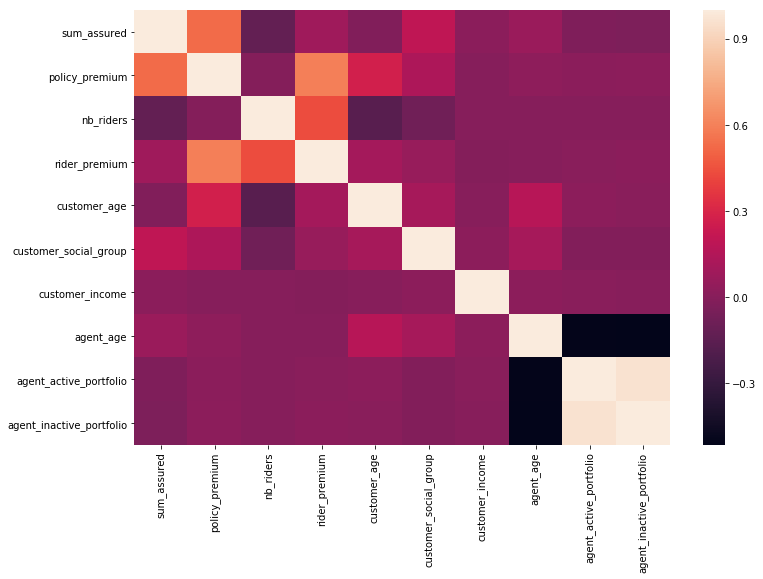

<Figure size 432x288 with 0 Axes>

In [14]:
numcols = data.columns[data.dtypes.eq('float64')]
# Plot a heatmap to determine if any variables are correlated
plt.figure(figsize=(12, 8))
sns.heatmap(data=data[numcols].corr())
plt.show()
plt.gcf().clear()

It seems most of the variables are informative... Except the last one which correlates too perfectly with the penultimate one.

In [15]:
data = data.drop(columns=["agent_inactive_portfolio"])

# 2. Visualizations <a class="anchor" id="2-bullet"></a> 

Now that the data is globally clean, we can build a few visualizations in order to provide some degree of explanation to our main problematic: why are customers churning?

## 2.1 Seasonality  <a class="anchor" id="2.1-bullet"></a> 

Are customers more likely to churn at some specific time in the year?

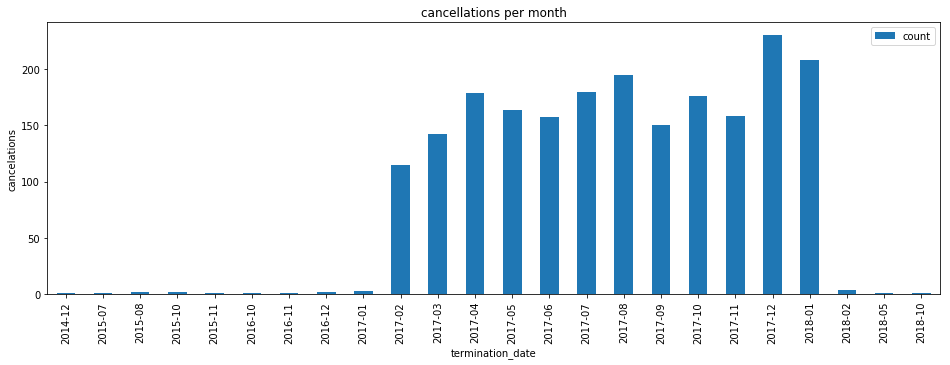

In [16]:
df_policy_info_cancelled = data[data["last_policy_status"]=="cancelled"][["last_termination_dt"]]
df_policy_info_cancelled = df_latest_policy_info.dropna()
df_policy_info_cancelled["count"] = 1
df_policy_info_cancelled["last_termination_dt"] = df_policy_info_cancelled["last_termination_dt"].map(lambda x: x.strftime('%Y-%m'))
cancellations_history = df_policy_info_cancelled.groupby("last_termination_dt").agg('sum')
ax = cancellations_history.plot(kind='bar', figsize=(16,5), title="cancellations per month")
ax.set_xlabel("termination_date")
ax.set_ylabel("cancelations")
plt.show()

Only a small fraction of termination dates (15% of cancellations) were available, therefore this chart is to be taken with a grain of salt. However, it seems data was mostly collected in 2017, and the number of cancelations seems stable at around 150 per month... Except maybe for december.

## 2.2. Product Performance <a class="anchor" id="2.2-bullet"></a> 

What are the worst policy types? Or do they just worth each other?

The 12 worst policy codes represent 25.00 % of policies and 78.95 % of cancellations


Text(0,0.5,'cancellation ratio')

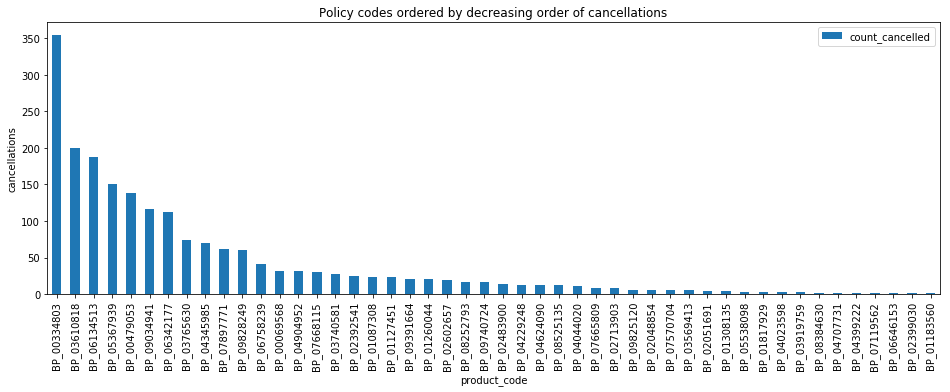

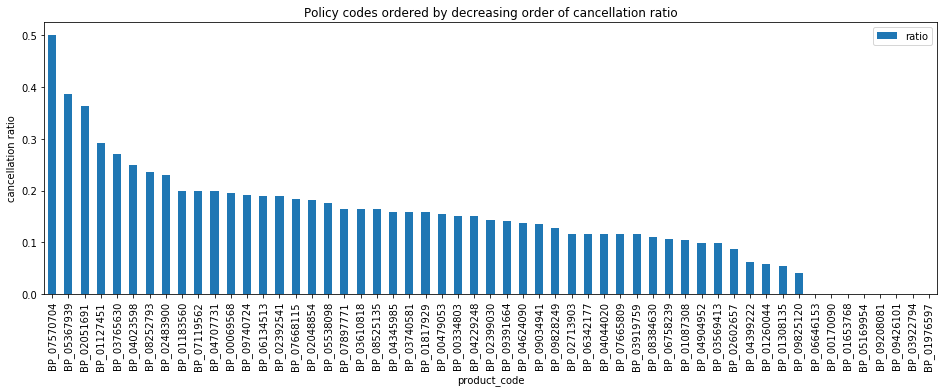

In [17]:
######################### Gathering the product code for each cancelled policy.
df_product_code_cancelled = data.dropna(subset=["policy_id", "last_policy_status"]).copy()
df_product_code_cancelled["status"]= df_product_code_cancelled["last_policy_status"].map(lambda x: 1 if x=="active" else 0.) # cancelled = 0.
df_product_code_active = df_product_code_cancelled[df_product_code_cancelled["status"] == 1. ]
df_product_code_cancelled = df_product_code_cancelled[df_product_code_cancelled["status"] == 0. ]
df_product_code_cancelled = df_product_code_cancelled[["product_code"]]
df_product_code_cancelled["count_cancelled"] = 1

######################### Counting the amount of cancelled policies per product code
df_product_code_cancelled = df_product_code_cancelled.groupby("product_code").agg("count")
df_product_code_cancelled = df_product_code_cancelled.sort_values(by="count_cancelled", ascending=False)
ax = df_product_code_cancelled.plot(kind="bar", figsize=(16,5), title="Policy codes ordered by decreasing order of cancellations")
ax.set_ylabel("cancellations")
n=12
print("The %d worst policy codes represent %4.2f %% of policies and %4.2f %% of cancellations"%(n, n / len(df_product_code_cancelled.index)*100,df_product_code_cancelled["count_cancelled"][:n].sum() / df_product_code_cancelled["count_cancelled"].sum()*100))

######################## Ratio of cancelled policies out of total subscriptions per product code
##### counting active policies
df_product_code_active = df_product_code_active[["product_code"]]
df_product_code_active["count_active"] = 1
df_product_code_active = df_product_code_active.groupby("product_code").agg("count")
df_product_code_active = df_product_code_active.sort_values(by="count_active", ascending=False)

##### merging
df_product_code_active = df_product_code_active.reset_index()
df_product_code_cancelled =df_product_code_cancelled.reset_index()
df_product_code = pd.merge(df_product_code_cancelled, df_product_code_active, on="product_code", how="outer")
df_product_code["ratio"]=df_product_code["count_cancelled"]/(df_product_code["count_cancelled"]+df_product_code["count_active"])

##### plotting
df_product_code = df_product_code.set_index("product_code")[["ratio"]]
df_product_code = df_product_code.sort_values(by="ratio", ascending=False)
ax = df_product_code.plot(kind="bar", figsize=(16,5), title="Policy codes ordered by decreasing order of cancellation ratio")
ax.set_ylabel("cancellation ratio")

In [18]:
######################## Printing out the codes of the worst policies
print([x for x in df_product_code_cancelled[:10]["product_code"].values if x in df_product_code[:20].index.values])

['BP_03610818', 'BP_06134513', 'BP_05367939', 'BP_03765630', 'BP_07897771']


This chart is very insightful. It shows that some policy codes are clearly disliked by customers and cancelled often, both in terms of ratio and absolute number. 
Maybe the insurer could investigate to decide if it should suppress these policies, or just be more careful about its subscribers. Performance on these high-risk products may be considered a KPI for the performance of the teams.

In particular the codes in the cell above correspond to products which are both in the worst20 for ratio of cancellation and worst10 for absolute number of cancellations.

## 2.3. Clustering :  <a class="anchor" id="2.3-bullet"></a> 
We want to find the best criterions to find if a policy is active or not

In [19]:
import pandas as pd
from clustering_functions import single_df, get_merged, available_db, allsublist

We load the merged database, with string fields replaced by numeric fields, in order to be able to apply K_means algorithm

In [20]:
merged1 = get_merged([available_db.latest_policy_info, 
                     available_db.customer_info, 
                     available_db.policy_info,
                     available_db.agent_info
                    ])

merged = merged1[['policy_status',
       #'last_payment_dt', 'policy_issue_dt', 
                  'sum_assured', 'policy_premium', 'nb_riders',
                  'rider_premium', 'last_policy_status',
                  'customer_origin','customer_gender', 'customer_marital_cd', 'customer_age',
       'customer_social_group', 'customer_income',
       'customer_additional_products', 'agent_age',
       'agent_tenure', 'agent_status', 'agent_active_portfolio',
       'agent_inactive_portfolio']]
del merged1

pd.options.mode.chained_assignment = None 
merged['policy_status'] =  merged['policy_status'].apply(lambda x : 1 if x=="active" else 0)
merged["last_policy_status"]= merged["last_policy_status"].apply(lambda x: 0 if x=="cancelled" else 1)
merged["customer_origin"]= merged["customer_origin"].apply(lambda x: 0 if x=="new" else 1)
merged["customer_gender"]= merged["customer_gender"].apply(lambda x: 0 if x=="F" else 1)
merged["agent_status"]= merged["agent_status"].apply(lambda x: 1 if x=="active" else 0)
merged.head()

,policy_status,sum_assured,policy_premium,nb_riders,rider_premium,last_policy_status,customer_origin,customer_gender,customer_marital_cd,customer_age,customer_social_group,customer_income,customer_additional_products,agent_age,agent_tenure,agent_status,agent_active_portfolio,agent_inactive_portfolio
0,1,1252000.0,1500.0,1.0,1100.0,1,0,0,1,45.0,6.0,70000.0,1,30.0,1,1,89.0,61.0
1,1,1252000.0,1600.0,1.0,1100.0,1,0,0,1,45.0,6.0,80000.0,1,30.0,1,1,89.0,61.0
2,1,1072000.0,2200.0,2.0,1600.0,0,0,1,1,55.0,1.0,90000.0,1,30.0,3,1,93.0,79.0
3,1,1360000.0,1500.0,2.0,1300.0,1,1,1,1,30.0,7.0,60000.0,2,30.0,3,1,93.0,79.0
4,1,1274000.0,1700.0,2.0,1300.0,1,1,1,2,40.0,3.0,150000.0,2,50.0,2,1,176.0,55.0


We want to have the X and y used for the K_means method

In [21]:
merged.dropna(inplace=True)
X_clustering,y_clustering = merged.drop(["policy_status"], axis = 1), merged['policy_status']

fields = ['customer_origin','customer_gender', 'customer_marital_cd', 'customer_age',
       'customer_social_group', 'customer_income',
       'customer_additional_products', 'agent_age',
       'agent_tenure', 'agent_status', 'agent_active_portfolio',
       'agent_inactive_portfolio']

We try to find which subset of field is the best, which one has the best prediction (here it is >0.65)

In [22]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from random import randint
from tqdm import tqdm_notebook as tqdm
random_state = 42

print("Score with random vector : about 0.50")
print("it may take about 2 minutes as there are many subset to analyze.")
good_subfield = []
for i in range(5,len(fields)):
    print("Trying to find the best predictions among",i,"sized subset of data.")
    for sublist_field in tqdm(allsublist(i,fields)):
        y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_clustering[list(sublist_field)])
        
        true_prediction = (y_pred==y_clustering)
        score = len(true_prediction[true_prediction==True])/len(true_prediction)

        if score > 0.65:
            good_subfield.append((sublist_field,score))

Score with random vector : about 0.50
it may take about 2 minutes as there are many subset to analyze.
Trying to find the best predictions among 5 sized subset of data.



Trying to find the best predictions among 6 sized subset of data.



Trying to find the best predictions among 7 sized subset of data.



Trying to find the best predictions among 8 sized subset of data.



Trying to find the best predictions among 9 sized subset of data.



Trying to find the best predictions among 10 sized subset of data.



Trying to find the best predictions among 11 sized subset of data.


In [23]:
best_fields = []
for field in fields:
    occurences = 0
    for sub in good_subfield:
        if field in sub[0]:
            occurences += 1
    print(field,occurences)
    if occurences > len(good_subfield)/2:
        best_fields.append(field)

print("\nbest fields for clustering :\n",best_fields)

customer_origin 40
customer_gender 44
customer_marital_cd 45
customer_age 55
customer_social_group 39
customer_income 0
customer_additional_products 41
agent_age 5
agent_tenure 34
agent_status 40
agent_active_portfolio 0
agent_inactive_portfolio 0

best fields for clustering :
 ['customer_origin', 'customer_gender', 'customer_marital_cd', 'customer_age', 'customer_social_group', 'customer_additional_products', 'agent_tenure', 'agent_status']


In [24]:
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X_clustering[list(best_fields)])
        
true_prediction = (y_pred==y_clustering)
score = score = len(true_prediction[true_prediction==True])/len(true_prediction)
print("Score obtained with the best set : {:.5f}".format(score))

Score obtained with the best set : 0.68281


Finally we found what are the relevant fields to predict if a policy will be active or not. It is very important to find such an information. Indeed, the company can aim its strategy on collecting relevant data.

# 3. Studies <a class="anchor" id="3-bullet"></a> 

Please find below links towards some of our studies. These are the real rampstudio-like challenges, addressed with the ramp-workflow framework. 

Each one of the following projects comes with a complete starting-kit:
- **DataBuilder.py**: a file which builds a training and testing sets in the folder "data/": *train.csv* and *test.csv*
- **classifier.py** and **feature_extractor.py**: 2 files located under "submissions/starting_kit/" used in a pipeline to make a prediction based on the *\*.csv* files
- **problem.py**: the file used by the command `ramp_test_submission --quick-test`

## 3.1 Global Churn prediction:  what are the main factors leading to churn? <a class="anchor" id="3.1-bullet"></a> 

In this section, we try to highlight the reasons behind a customer's decision to cancel a contract. In order to do so, we use interpretable models such as linear regressions or random forests, and then we explore the relative importance of the features in the decision-making process, as well as the process itself in the case of a single tree.

With the starting kit, we achieve about 70% accuracy. 

## 3.2 Customer Value regression: which customers are to be targeted by the insurer? <a class="anchor" id="3.2-bullet"></a> 
In this section, we try to find the most appropriate insurance policy for customers based on their profiles.
In order to do so, we predict for each policy the value that each customer is willing to pay.

With the starting kit, we achieve about 70% accuracy. 

## 3.3 Agent performance regression: what are the best performing agents? <a class="anchor" id="3.3-bullet"></a> 

In this part, we try to answer the question why some agent performs better than others. 

From a business point of view this is a rather important question as the assurance company would like to understand how they can improve agent performance. Therefore we use an agent score, a KPI created as the average of the total percentage of portfolio held by an agent and the percentage of active portfolio held by an agent, and we try to predict whether an agent has a higher than median score or not. We find the following main results: 
   - Firstly, better performing agents do not perform better because they have a better clientele. They have almost the same types of clients as less well performing agents. 
   - Second, well performing agents are good in both having more contracts and having a higher percentage of active portfolios. 
   - Third, agents who perform better sell more additional products to clients. We think this is one of the reasons why they can retain the clients better: if a client has several insurances with the entreprise, s/he might be more likely to stick around for the comfort of one agent handling all assurances. Therefore if the company tries to decrease the percenatage of leaving clients, it should propose more package deals or reductions to already existing clients on additional products. 
   - Finally better performing agents use less contact by channel brokers and they have a larger portfolio (more contracts). 
  
With the starting kit, we achieve about 70% accuracy. 

# 4. Conclusion <a class="anchor" id="4-bullet"></a> 

In this study we provide a data-based approach that could be used by an insurance company in order to increase its profit. Increasing profit means avoiding churn, better targeting customers, deleting some products, efficiently motivating employees.

We build explainable models, each trying to understand a different aspect of performance. We belive our results constitute an interesting basis for a strategic analysis of the particular insurance company studied.

We see that there could be many possible ways to improve the performance of the company, however we would need more industry knowledge, and potentially more data, to provide in-depth recommandations. 